## Data Analysis 

This notebook was to process the data, including preprocessing, processing the data and performing data analytics.

The main goal is to discover the patterns inside polymers

## Part 1: Generating Structure Files 

Using rdkit to generate files including strcutrue details of polymers, including molecular access system, how many bonds or rings it has, and etc.

In [1]:
import pandas as pd
import numpy as np
from sompy.sompy import SOMFactory

# import sklearn
import sklearn
import sklearn.cluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# statsmodels here
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

CACHEDIR=C:\Users\jtz93\.matplotlib
Using fontManager instance from C:\Users\jtz93\.matplotlib\fontlist-v310.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import AllProps
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing as MolDrawing
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
from IPython.display import SVG
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem
from rdkit.Chem import AllProps
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs
import rdkit.Chem.rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import Properties
from rdkit.Chem import rdMolChemicalFeatures
from rdkit.Chem import MolToMolBlock
from rdkit.Chem import Mol
from rdkit.Chem import rdmolops
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import rdFMCS
from rdkit.Chem.Fingerprints import FingerprintMols

from rdkit import Geometry
from rdkit.Geometry import Point3D
from rdkit.Geometry import Point2D
import time

%matplotlib inline

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
from tfprop_sompy import tfprop_config
from tfprop_sompy import tfprop_vis
from tfprop_sompy import tfprop_config as tfpinit

In [5]:
# include atom numbers
DrawingOptions.includeAtomNumbers = False

In [6]:
global_path = "./data/compdata.csv"
data = pd.read_csv(global_path).set_index("ID No.")
data["Mn (kg mol^-1)"] = data["Mn (kg mol^-1)"].convert_objects(convert_numeric=True) #has to be here, otherwise dype = object
names = ["Voc","Jsc","FF","Mw", "DP","Bandgap"] #select essential experimental factors

In [7]:
SMILES = data["SMILES"]
data.head(5)

,Nickname,Ref. No,PCE_max(%),PCE_ave(%),Voc (V),Jsc (mA cm^2),FF,Mw (kg mol^-1),Mn (kg mol^-1),PDI (=Mw/Mn),Monomer (g mol^-1),HOMO,LUMO,Bandgap,SMILES
ID No.,,,,,,,,,,,,,,,
1,PBTTT-C14,S1,2.34,2.34,0.53,9.37,0.48,46.2,22.0,2.10,724,5.10,3.10,1.88,CC1=CC(CCCCCCCCCCCCCC)=C(C2=CC3=C(S2)C=C(C4=C(CCCCCCCCCCCCCC)C=C(C)S4)S3)S1
2,PCDTBT,S2,3.60,3.60,0.89,6.92,0.63,73.0,37.0,1.97,731,5.50,3.60,1.88,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C(C5=CC=C(C6=CC=C(C)S6)C7=NSN=C57)S4)=C2)=C3C=C1
3,PCPDTBT,S3,5.12,5.12,0.61,15.73,0.53,47.6,26.6,1.79,564,5.30,3.55,1.43,CC1=CC(C(CC(CCCC)CC)(CC(CCCC)CC)C2=C3SC(C4=CC=C(C)C5=NSN=C45)=C2)=C3S1
4,PffBT4T-2OD,S4,10.50,10.20,0.77,18.40,0.74,93.7,47.5,1.97,1089,5.34,3.69,1.65,CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C(C3=CC(CC(CCCCCCCCCC)CCCCCCCC)=C(C4=CC=C(C5=CC=C(C)S5)S4)S3)C6=NSN=C62)S1
5,PffBT4T-2OD,S4,10.40,10.00,0.77,18.20,0.74,52.9,28.2,1.88,1089,5.20,3.57,1.63,CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC(CC(CCCCCCCC)CCCCCCCCCC)=C(C4=CC(F)=C(C5=C(F)C=C(C)S5)S4)S3)C6=NSN=C62)S1


In [8]:
data.info()
# reading data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 1 to 1203
Data columns (total 15 columns):
Nickname              1203 non-null object
Ref. No               1203 non-null object
PCE_max(%)            1203 non-null float64
PCE_ave(%)            1203 non-null float64
Voc (V)               1203 non-null float64
Jsc (mA cm^2)         1203 non-null float64
FF                    1203 non-null float64
Mw (kg mol^-1)        1203 non-null float64
Mn (kg mol^-1)        1203 non-null float64
PDI (=Mw/Mn)          1203 non-null float64
Monomer (g mol^-1)    1203 non-null int64
HOMO                  1203 non-null float64
LUMO                  1203 non-null float64
Bandgap               1203 non-null float64
SMILES                1203 non-null object
dtypes: float64(11), int64(1), object(3)
memory usage: 150.4+ KB


In [9]:
data.isnull().sum() 
# there is no missing value

Nickname              0
Ref. No               0
PCE_max(%)            0
PCE_ave(%)            0
Voc (V)               0
Jsc (mA cm^2)         0
FF                    0
Mw (kg mol^-1)        0
Mn (kg mol^-1)        0
PDI (=Mw/Mn)          0
Monomer (g mol^-1)    0
HOMO                  0
LUMO                  0
Bandgap               0
SMILES                0
dtype: int64

## Rdkit MACCS keys fingerprints examples

In [16]:
def read_MACCS(SMILES):
    mol = [Chem.MolFromSmiles(x) for x in SMIELS]
    bv = [MACCSkeys.GenMACCSKeys(i) for i in mol]
    tuple(bv.GetOnBits())

In [17]:
def MACCS_keys(df):
    from rdkit.Chem.Fingerprints import FingerprintMols
    SMILES = df["SMILES"]
    mol = [Chem.MolFromSmiles(x) for x in SMILES]
    fps = [MACCSkeys.GenMACCSKeys(x) for x in mol]
    ls = []
    for x in fps:
        s= list(x.GetOnBits())
        ls.append(s)
    return pd.DataFrame(ls).set_index(df["ID No."])

In [18]:
MACCS = MACCS_keys(data) #print out MACCS keys, lists of numbers
MACCS.to_csv(path_or_buf="./data/MACCS.csv")

## Calculate molecular properties 

In [19]:
#calculate properties
def Properties_Calc(df):
    """
    This function is to obtain molecular properteis from rdkit
    """
    SMILES = df['SMILES'].dropna()
    ls = []
    for x in SMILES:
        mol = Chem.MolFromSmiles(x)
        properties = rdkit.Chem.rdMolDescriptors.Properties()
        name = properties.GetPropertyNames()
        value = properties.ComputeProperties(mol,annotateMol = True)
        repo = [name,value]
        ls.append(repo)
    return pd.DataFrame(ls,index=df["ID No."],columns=['prop_name','prop_value'])

In [28]:
props = Properties_Calc(data)

In [20]:
#read properties and drop useless properties 
def read_prop(df,df_prop):
    """
    This function is used to compile a dataframe that has the column as 
    property names and value as property values
    """
    vals = (df_prop["prop_value"]) #can't make it to list
    cols = ["exactmw", "lipinskiHBA", "lipinskiHBD", "NumRotatableBonds", "NumHBD", "NumHBA", 
            "NumHeteroatoms", "NumAmideBonds", "FractionCSP3", "NumRings", "NumAromaticRings", "NumAliphaticRings", 
            "NumSaturatedRings", "NumHeterocycles", "NumAromaticHeterocycles", "NumSaturatedHeterocycles", "NumAliphaticHeterocycles", 
            "NumSpiroAtoms", "NumBridgeheadAtoms", "NumAtomStereoCenters", "NumUnspecifiedAtomStereoCenters", "labuteASA", 
            "tpsa", "CrippenClogP", "CrippenMR"]
    dropcols = ["exactmw"]
    a = pd.DataFrame(columns=cols)
    for x in vals: #25 names 
        b = pd.DataFrame(data=[x], columns=cols)
        a = a.append(b)
    return pd.DataFrame(a).drop(columns=dropcols).set_index(df["ID No."])

In [21]:
#save red region to csv
data_prop = Properties_Calc(data)
prop =read_prop(data,data_prop)
prop.to_csv(path_or_buf="./data/Prop.csv")

In [22]:
prop = pd.read_csv(r"./data/Prop.csv").replace("-",None).dropna().set_index("ID No.")
data2 = data.set_index("ID No.")
frame = [data2,prop]

new_df = pd.concat(frame,axis=1,sort=False)
new_df.to_csv(path_or_buf="./data/compdata_temp_prop.csv")

## Correlation Matrix Between Properties and Structures

In [77]:
# This is a self-correlation matrix map
def corr_matrix(prop_df, usecols=[], cmap=None):

    # calculate correlation matrix from pandas DaraFrame
    corr_mat = np.corrcoef(prop_df[usecols].values.T)
    # The following one also works well and return DataFrame (might be slower)
    # corr_mat = prop_df[usecols].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # create figure instance
    sns.set_style('white')
    fig, ax = plt.subplots(1, 1, figsize=tfpinit.corrmat_size)

    # Generate a Seaborn colormap
    cmap = cmap or sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    cax = fig.add_axes([0.75, 0.2, 0.02, 0.5])  # shift color bar
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3,
                square=True, linewidths=.5,
                cbar_ax=cax,
                # cbar_kws={'shrink': .6},
                # xticklabels=usecols, yticklabels=usecols,
                annot=True, annot_kws={'fontsize': 14}, fmt='.2f', ax=ax)
    # empty string to last element of usecols
    xlabels = np.append(usecols[:-1], '')
    ax.set_xticklabels(xlabels, rotation=45)
    # empty string to first element of usecols and inverse order of list
    ylabels = np.append(usecols[:0:-1], '')
    ax.set_yticklabels(ylabels, rotation=0)
    ax.tick_params(bottom='off', left='off',
                   top='off', right='off')  # turn off ticks

    plt.show()

    if tfpinit.isOutCorrMat:
        print("Saving figure of correlation matrix to {}...".
              format(tfpinit.fout_corrmat))
        fig.savefig(tfpinit.fout_corrmat)

C:\Users\jtz93\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\jtz93\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\jtz93\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\jtz93\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\jtz93\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: Matplotlib

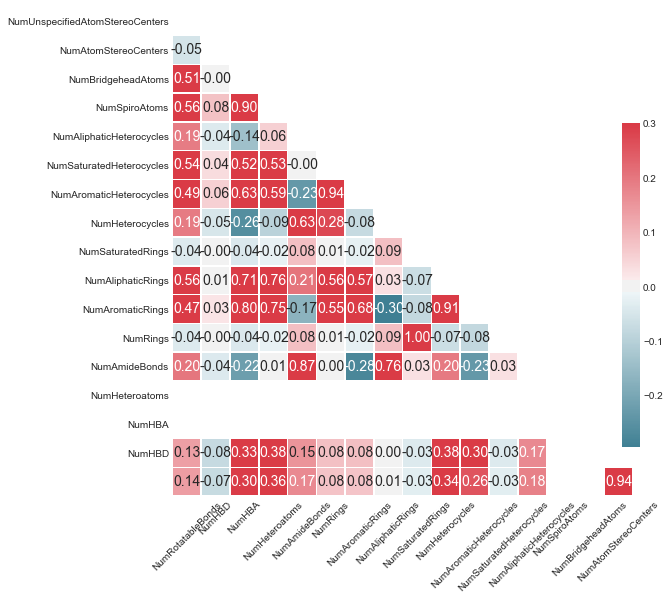

In [78]:
corr_matrix(Prop,usecols = Prop.columns)

## Appending Data to New Columns 

Now we want to concatanate two dataframes to perform a correlation matrix 

In [79]:
# append the PCE_ave to the end of dataset in each high pce regions
frame1 = [A1_df["PCE_ave"],A1_prop]
frame2 = [A2_df["PCE_ave"],A2_prop]
frame3 = [A3_df["PCE_ave"],A3_prop]
frame4 = [A4_df["PCE_ave"],A4_prop]

frame = [df["PCE_ave"],prop]

drop_cols = ["NumHBD","NumSpiroAtoms","NumSaturatedRings","NumSaturatedHeterocycles","NumBridgeheadAtoms"]
result1 = pd.concat(frame1,axis=1).drop(columns = drop_cols)
result2 = pd.concat(frame2,axis=1).drop(columns = drop_cols)
result3 = pd.concat(frame3,axis=1).drop(columns = drop_cols)
result4 = pd.concat(frame4,axis=1).drop(columns = drop_cols)

# global one
result = pd.concat(frame,axis=1).drop(columns = drop_cols)

## Scatter Plots

from the scatterplots above we can hardly see any correlation since limited amount of data and features. We want to perform scatter matrix on the entire scope

In [80]:
result2.head(3)

,PCE_ave,NumRotatableBonds,NumHBA,NumHeteroatoms,NumAmideBonds,NumRings,NumAromaticRings,NumAliphaticRings,NumHeterocycles,NumAromaticHeterocycles,NumAliphaticHeterocycles,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters
ID No.,,,,,,,,,,,,,
13,8.50,48.0,10.0,10.0,0.0,8.0,8.0,0.0,6.0,6.0,0.0,2.0,2.0
86,6.67,29.0,10.0,10.0,0.0,10.0,9.0,1.0,8.0,8.0,0.0,4.0,4.0
104,7.71,45.0,11.0,12.0,2.0,11.0,10.0,1.0,10.0,9.0,1.0,3.0,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001765FC1AC18>,
      dtype=object)

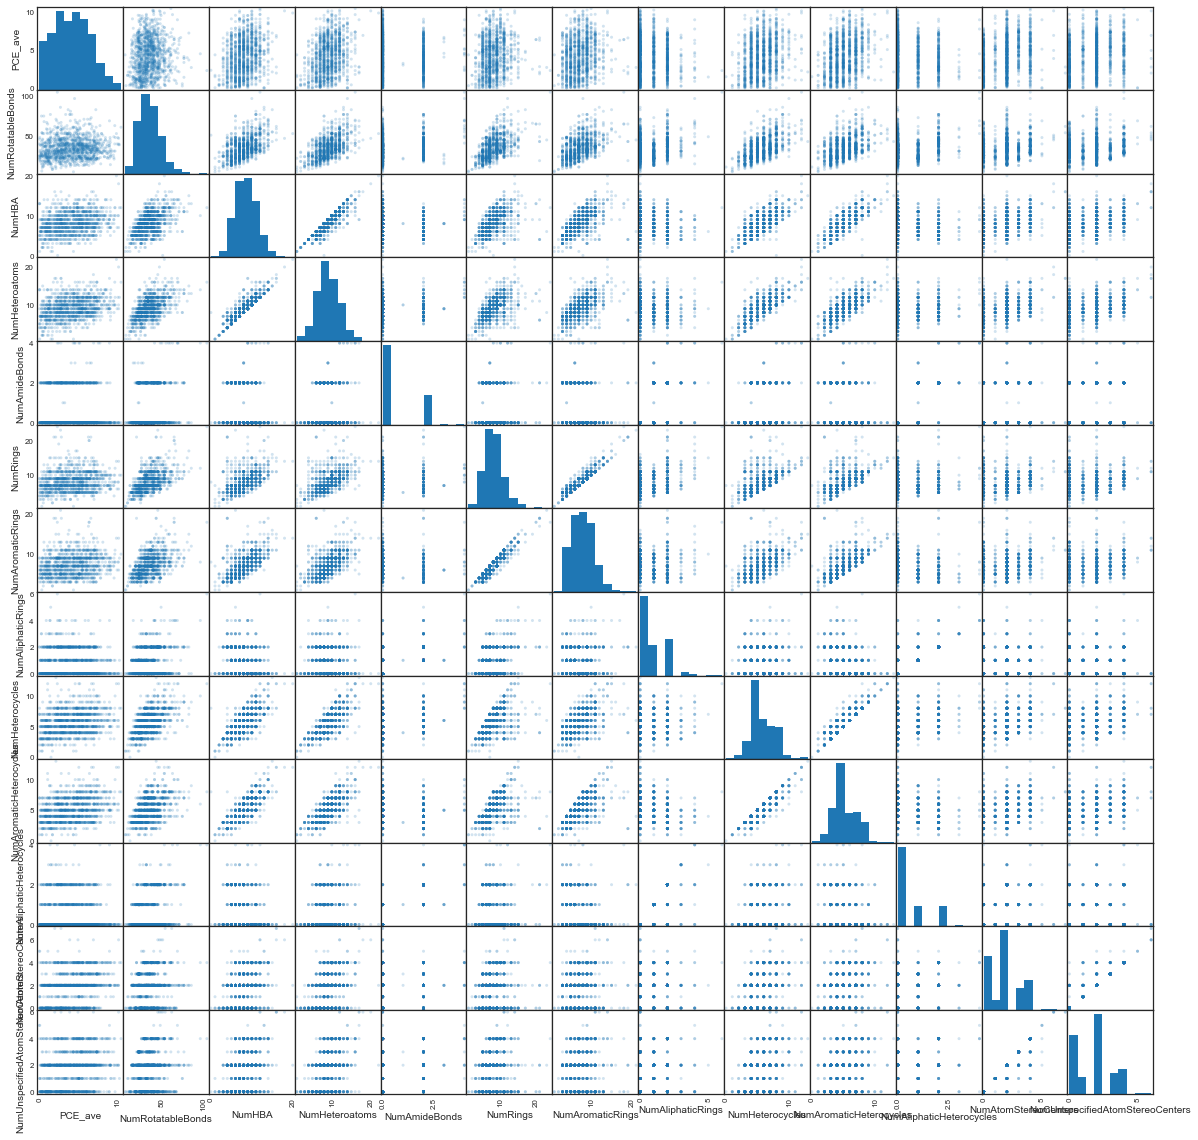

In [82]:
pd.plotting.scatter_matrix(result,alpha=0.2,figsize=(20,20))

# from the graph shown, most of them have poor coorelations 

**from the graph shown above we can see there is no linear relationship as expected - of course**

## Use Calculated Properties to Categorize the Data

#### MACCS keys and calculated properties
* Molecular access system

In [83]:
MACCS_A1 = pd.read_csv(r"./data/MACCS_A1.csv").set_index("ID No.").fillna(0)
MACCS_A2 = pd.read_csv(r"./data/MACCS_A2.csv").set_index("ID No.").fillna(0)
MACCS_A3 = pd.read_csv(r"./data/MACCS_A3.csv").set_index("ID No.").fillna(0)
MACCS_A4 = pd.read_csv(r"./data/MACCS_A4.csv").set_index("ID No.").fillna(0)

### Molecular Fingerprints and Similarity Methods in Use

***MACCS***: It comes in two variants, one with 960 and the other with 166 structural keys based on SMARTS patterns. The shorter one is the most commonly used, as it is relatively small in length (only 166 bits), but covers most interesting chemical features for drug discovery and virtual screening.

The paper [molecular fingerprint similarity search in virtual screening](https://ac.els-cdn.com/S1046202314002631/1-s2.0-S1046202314002631-main.pdf?_tid=a87ecb05-008f-49e3-a77f-d689314b31d2&acdnat=1548145492_1a464f1063f437f5975461621fa39a82)


In [84]:
MACCS_A1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
ID No.,,,,,,,,,,,,,,,,,,,,,
158,36,57,62,65,71,72,77,79,81,83,...,160.0,161.0,162.0,163.0,164.0,165.0,0.0,0.0,0.0,0.0
203,26,36,45,50,62,75,76,80,81,83,...,162.0,163.0,164.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0
244,36,50,62,75,76,81,83,85,88,92,...,163.0,164.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,36,50,62,75,76,81,83,85,88,92,...,163.0,164.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,36,41,52,62,65,70,75,77,79,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualization of Molecules in Different Regions

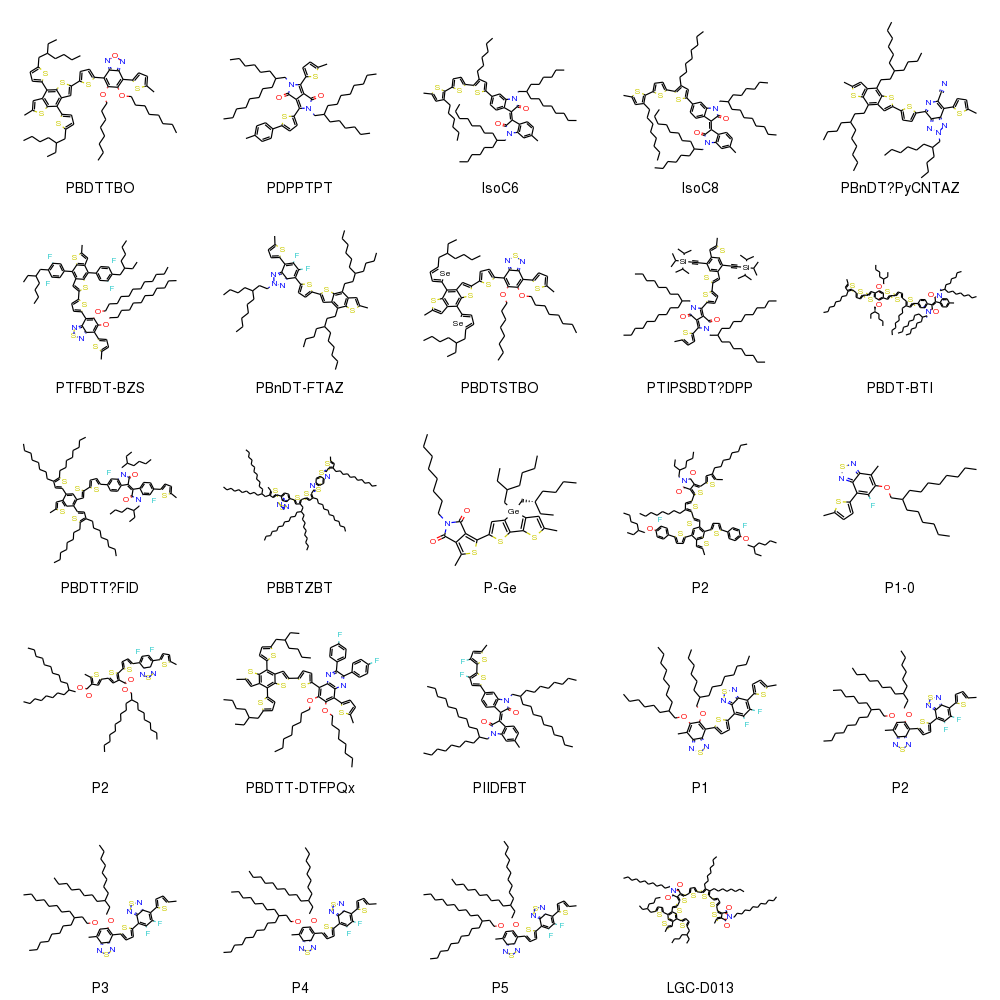

In [187]:
Name = A1.Nickname
SMILES=A1.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/A1",format="PNG")
s

In [86]:
def MolBlock(SMILES,Name):
    blocks = []
    for x in SMILES:
        m2 = Chem.MolFromSmiles(x)
        block = Chem.MolToMolBlock(m2)
        blocks.append(block)
        return pd.Series(blocks)

In [87]:
b = MolBlock(A1.SMILES,A1.Nickname)
# b

### Any way to classify or categorize ?

In [88]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
Chem.MolToSmiles(tmp)

'[1*]c1cncnc1[2*]'

In [89]:
print(Chem.MolToMolBlock(tmp)) #with an extra side chain group R
print(Chem.MolToMolBlock(core)) 
print(Chem.MolToMolBlock(m1)) 


     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 R   0  0  0  0  0  1  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 R   0  0  0  0  0  1  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  7  2  1  0
M  ISO  2   1   1   8   2
M  END


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 N

In [90]:
tmp.GetNumAtoms() 

8

### Examples - 

MCS (maximum common subgraph)

Class Mol

* AddConformer
* ClearComputedProps
* ClearProp
* Debug
* GetAtomWithIdx
* GetAtoms
* GetBondBetweenAtom* s
* GetBondWithIdx
* GetBonds
* GetConformer
* GetConformers
* GetNumAtoms
* GetNumBonds
* GetNumConformers
* GetProp
* GetPropNames
* GetRingInfo
* GetSubstructMatch
* HasProp


The goal is to be able to use custom atom types in the MCS code, yet still be able to get a readable SMILES for the MCS. We will use the MCS code’s option to use isotope information in the matching and then set bogus isotope values that contain our isotope information.

The code:

### Fragment the molecule by cutting out the bonds

if we fragment the molecule by cutting the rotatable bonds, would this make 

In [ ]:
from rdkit import Chem
 
patt = Chem.MolFromSmarts('[!$([NH]!@C(=O))&!D1&!$(*#*)]-&!@[!$([NH]!@C(=O))&!D1&!$(*#*)]')
mol = Chem.MolFromSmiles("c1ccc2c(c1)C(=NC(C(=O)N2CC(=O)O)Cc3ccc(cc3)O)c4cccc(c4)O")
 
# find the rotatable bonds
bonds = mol.GetSubstructMatches(patt)
 
# create an editable molecule, break the bonds, and add dummies:
em = Chem.EditableMol(mol)
nAts = mol.GetNumAtoms()
for a,b in bonds:
    em.RemoveBond(a,b)
    em.AddAtom(Chem.Atom(0))
    em.AddBond(a,nAts,Chem.BondType.SINGLE)
    em.AddAtom(Chem.Atom(0))
    em.AddBond(b,nAts+1,Chem.BondType.SINGLE)
    nAts+=2
p = em.GetMol()
Chem.SanitizeMol(p)
 
smis = [Chem.MolToSmiles(x,True) for x in Chem.GetMolFrags(p,asMols=True)]
for smi in smis: print (smi)
 
# ----------------------------------
# There's actually an easier way to do this since the BRICS decomposition code has
# exactly the function we need:
from rdkit.Chem import BRICS
bonds = [((x,y),(0,0)) for x,y in bonds]
p = BRICS.BreakBRICSBonds(mol,bonds=bonds)
 
smis = [Chem.MolToSmiles(x,True) for x in Chem.GetMolFrags(p,asMols=True)]
for smi in smis: print (smi)


In [ ]:
# C1CCC1OC
AllChem.ComputeGasteigerCharges(mol)
for a in mol.GetAtoms():
    print("atom %s id=%i has %f charge" % (a.GetSymbol(), a.GetIdx(), float(a.GetProp('_GasteigerCharge'))))

In [ ]:
mol.GetNumAtoms()
mol.GetBonds()
mol.GetSubstructMatches

## Example - attempt to analyze P3HT structure

In [ ]:
p3ht = Chem.MolFromSmiles('CC1=CC(CCCCCC)=C(C)S1') #P3HT
p3ht_H = Chem.AddHs(p3ht)
# use the original distance geometry + minimisation method
AllChem.EmbedMolecule(p3ht_H)
AllChem.UFFOptimizeMolecule(p3ht_H)

In [ ]:
coord = Chem.MolToMolBlock(p3ht_H)
p3ht
# branching location is at the atom index of 3 on the ring, and it is 7 atoms long

In [ ]:
p3ht_H

In [ ]:
print(coord)

In [ ]:
m2.GetNumAtoms() #33 atoms total 

### weekly goal
1/29/2019
	1. Find polymers with low efficiency that against the criterion 
	2. Backbone characterization 
	3. S, O , N, F classification
	4. Red points on overall plot 
Calculate branch backbone length, calculate side chain / backbone ratio 

There are totally 7 regions:
1. 970, 997, 56
2. 689, 636
3. 960, 961
4. 
5. 423, 834, 266, 903, 1112, 1111
6. 745, 368, 233, 369, 813, 620, 621, 396, 620, 972, 300, 281, 496, 528, 305, 424, 803, 394
7. 610, 94

In [65]:
# low PCE area regions
low_A1 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest1.csv").set_index("ID No.")
low_A2 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest2.csv").set_index("ID No.")
low_A3 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest3.csv").set_index("ID No.")
low_A5 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest5.csv").set_index("ID No.")
low_A6 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest6.csv").set_index("ID No.")
low_A7 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest7.csv").set_index("ID No.")
low_A8 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest8.csv").set_index("ID No.")
low_A9 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest9.csv").set_index("ID No.")
low_A10 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest10.csv").set_index("ID No.")
low_A11 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest11.csv").set_index("ID No.")
low_A12 = pd.read_csv(r"./data/Low_PCE_Regions/low_Area_of_interest12.csv").set_index("ID No.")

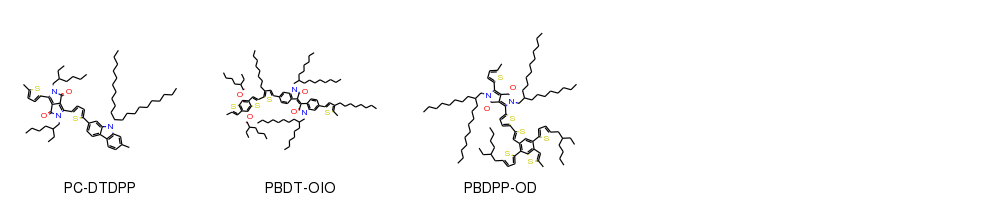

In [170]:
Name = low_A1.Nickname
SMILES = low_A1.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/low_A1",format="PNG")
s

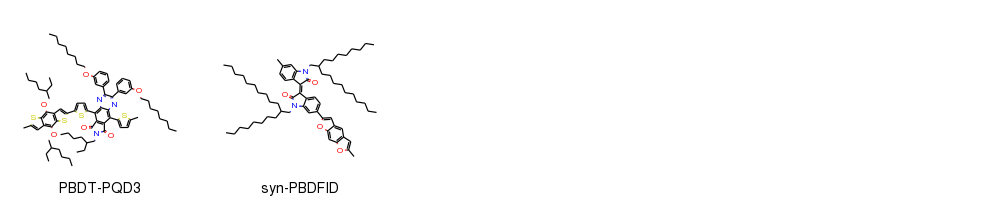

In [171]:
Name = low_A2.Nickname
SMILES = low_A2.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/low_A2",format="PNG")
s

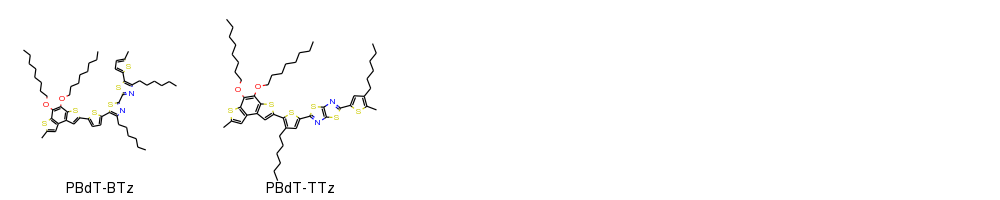

In [172]:
Name = low_A3.Nickname
SMILES = low_A3.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow = 5,legends = [x for x in Name],subImgSize = (200,200))
s.save(fp="Images/moles/low_A3",format="PNG")
s

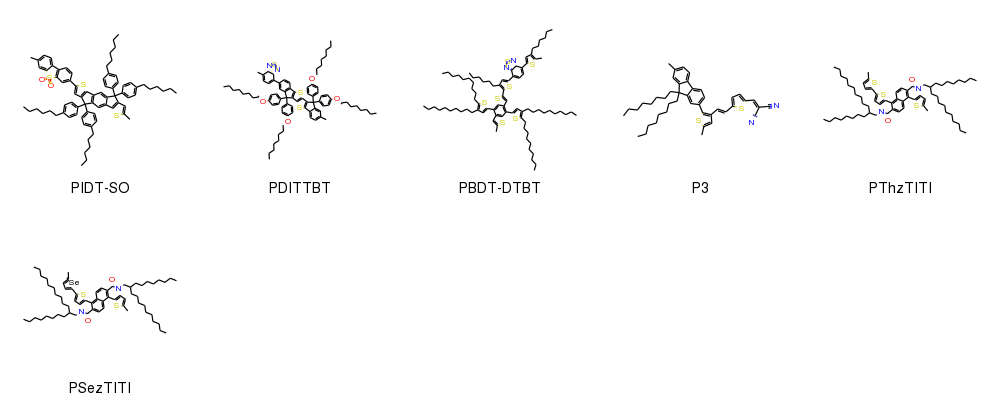

In [173]:
Name = low_A5.Nickname
SMILES = low_A5.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/low_A5",format="PNG")
s

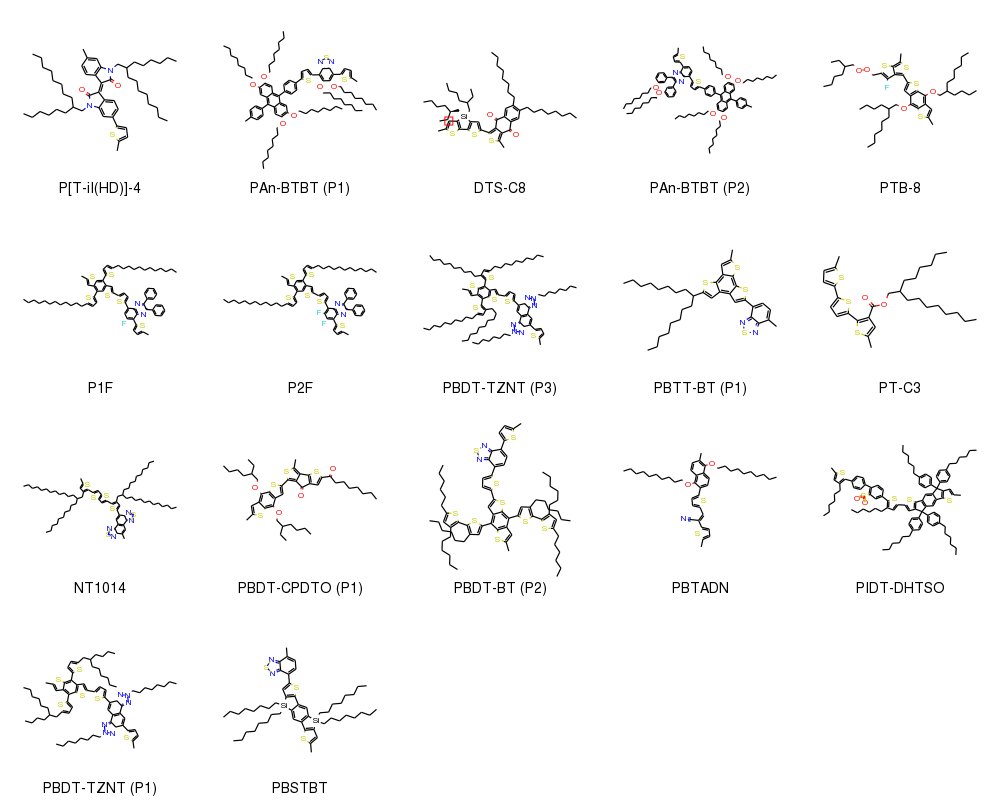

In [174]:
Name = low_A6.Nickname
SMILES = low_A6.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/low_A6",format="PNG")
s

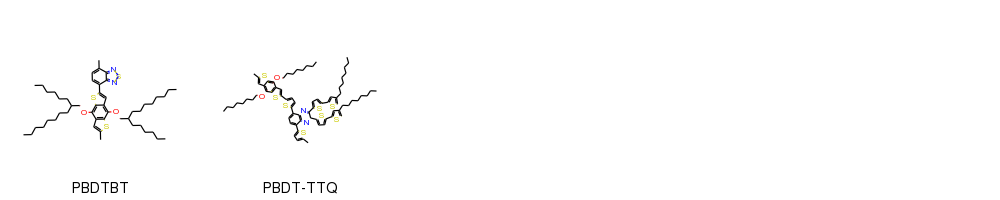

In [175]:
Name = low_A7.Nickname
SMILES = low_A7.SMILES
mol = [Chem.MolFromSmiles(x) for x in SMILES]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/low_A7",format="PNG")
s

### classify polymers based on backbone structure 
1. manually select polymers with similar structures 
2. print maps out
3. find out common atoms (number and type of atoms)


In [31]:
def target_data (data,data_index,target_list):
    tar_list = []
    for i in data_index:
        if i in target_list:
            tar_list.append(i)
    return data.loc[tar_list,:]

In [59]:
# for classifications
def gen_save_img(data,save_name):
    name = data.Nickname
    SMILES = data.SMILES
    mol = [Chem.MolFromSmiles(x) for x in SMILES]
    s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in name],subImgSize=(200,200))
    s.save(fp=("Images/moles/High_PCE_Regions/Classifications/"+ save_name),format="PNG")

In [418]:
a_total = list(A1+A2+A3+A4)
a_rem = filter_data(data,list(data.index),a_total)

names = ["PCE_ave","Voc","Jsc","FF","Mn","HOMO","LUMO"]
features = ["PCE_ave(%)","Voc (V)","Jsc (mA cm^2)","FF","Mn (kg mol^-1)","-HOMO (eV)","-LUMO (eV)"]

a_rem = a_rem[features]
a_rem.columns = names
a_rem["Mn"] = a_rem["Mn"].convert_objects(convert_numeric=True) #has to be here, otherwise dype = object

C:\Users\jtz93\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [419]:
a_rem.head(5)

,PCE_ave,Voc,Jsc,FF,Mn,HOMO,LUMO
ID No.,,,,,,,
1,2.34,0.53,9.37,0.48,22.0,5.10,3.10
2,3.60,0.89,6.92,0.63,37.0,5.50,3.60
3,5.12,0.61,15.73,0.53,26.6,5.30,3.55
4,10.20,0.77,18.40,0.74,47.5,5.34,3.69
5,10.00,0.77,18.20,0.74,28.2,5.20,3.57


In [6]:
PBnDTFTAZ = "CCCCCCC(CCCC)CCc1c2cc(-c3ccc(-c4c(F)c(F)c(-c5ccc(C)s5)c5nn(CCC(CCCC)CCCCCC)nc45)s3)sc2c(CCC(CCCC)CCCCCC)c2cc(C)sc12"
BTTBTz = "CCCCCCCCCCCCC(CCCCCCCCCCC)c1cc2c(s1)C1C=C(c3sc(-c4nc(CCCCCC)c(C)s4)nc3CCCCCC)SC1c1sc(C)cc1-2"
PBDDPT = "CCCCC(CC)Cc1cc(-c2sc(-c3cc(CC(CC)CCCC)c(-c4ccc(-c5ccc(C)s5)s4)s3)c3c2C(=O)c2c(CC(CC)CCCC)sc(CC(CC)CCCC)c2C3=O)sc1C"
PIDTTTT = "CCCCCCc1ccc(C2(c3ccc(CCCCCC)cc3)c3cc4c(cc3-c3sc5cc(C)sc5c32)C(c2ccc(CCCCCC)cc2)(c2ccc(CCCCCC)cc2)c2c-4sc3cc(-c4cc5sc(C)cc5s4)sc23)cc1"
PBnDTFTAZ = "CCCCCCC(CCCC)CCc1c2cc(-c3ccc(-c4c(F)c(F)c(-c5ccc(C)s5)c5nn(CC(CCCC)CCCCCC)nc45)s3)sc2c(CCC(CCCC)CCCCCC)c2cc(C)sc12"
PBDT2FT = "CCCCC(CC)COc1c2cc(-c3sc(C)c(F)c3F)sc2c(OCC(CC)CCCC)c2cc(C)sc12"
PBnDTFTAZ = "CCCCCCc1cc(CCCCCC)c(-c2sc(-c3c4cc(-c5sc(C)c6c5C(=O)N(CCCCCC)C6=O)sc4c(-c4cc(CCCCCC)c(-c5sc(CCCCCC)cc5CCCCCC)s4)c4cc(C)sc34)cc2CCCCCC)s1"

In [7]:
all_red = [PBnDTFTAZ,BTTBTz,PBDDPT,PIDTTTT,PBnDTFTAZ,PBDT2FT,PBnDTFTAZ]
Name = ['PBnDT-FTAZ','BTT-BTz','PBDDPT','PIDTT-TT','PBnDT-FTAZ','PBDT[2F]T','PBnDT-FTAZ']

STREAM b'IHDR' 16 13
STREAM b'bKGD' 41 6
b'bKGD' 41 6 (unknown)
STREAM b'IDAT' 59 8192


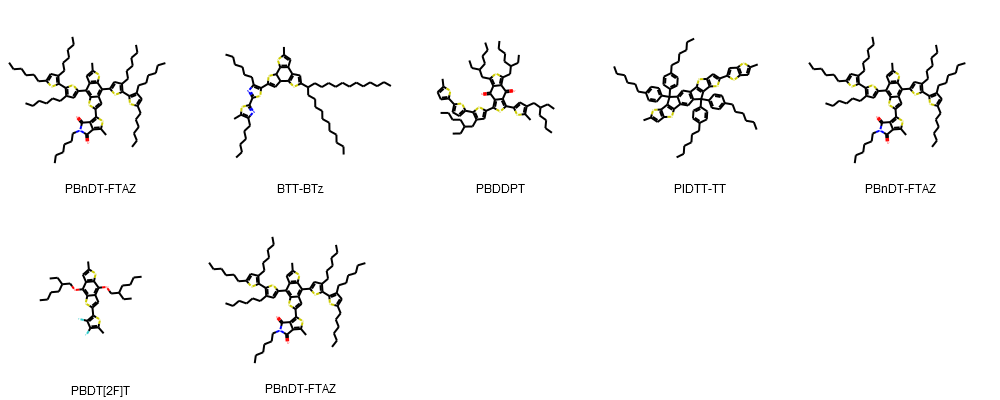

In [8]:
mol = [Chem.MolFromSmiles(x) for x in all_red]
s = Draw.MolsToGridImage(mol,molsPerRow=5,legends=[x for x in Name],subImgSize=(200,200))
s.save(fp="Images/moles/A1",format="PNG")
s